In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pickle.load(open("song_df.pkl","rb"))
df

,bird,species,WavTime,WavLoc,WaveFileName,Position,Length,NumNote,NotePositions,NoteLengths,NoteLabels
0,CATH-TLR2,CATH,2012-01-19 07:13:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-01-...,2012-01-19_07-13-00-000000.wav,None,None,25,"[1524, 105140, 211544, 302689, 403084, 504005,...","[3637, 3533, 3325, 2909, 3221, 3429, 3117, 311...","[aaa, aaa, aaa, aaa, aaa, aaa, aaa, aaa, aaa, ..."
1,CATH-TLR2,CATH,2012-02-09 13:45:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-02-...,2012-02-09_13-45-00-000000.wav,None,None,398,"[4431, 27697, 53560, 84720, 114114, 142262, 15...","[3635, 7478, 12879, 13294, 14125, 6128, 4570, ...","[neq, akx, nfo, nfo, nfo, ala, alb, ala, ala, ..."
2,CATH-TLR2,CATH,2012-02-08 10:25:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-02-...,2012-02-08_10-25-00-000000.wav,None,None,98,"[20438, 39561, 61490, 85601, 114285, 144528, 1...","[5196, 4676, 12263, 11536, 12471, 6547, 7586, ...","[aia, aib, aic, aic, aic, aid, aie, aie, aid, ..."
3,CATH-TLR2,CATH,2012-02-09 10:30:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-02-...,2012-02-09_10-30-00-000000.wav,None,None,819,"[20426, 47536, 77138, 108817, 138046, 149991, ...","[13191, 13918, 13087, 13918, 3739, 9348, 8517,...","[nfo, nfo, nfo, nfo, aku, akr, aks, aks, akq, ..."
4,CATH-TLR12,CATH,2012-01-19 08:00:00,./data_clean/data/CATH/CATH-TLR12/wavs/2012-01...,2012-01-19_08-00-00-000000.wav,None,None,15,"[14921, 214668, 229218, 263722, 362251, 380958...","[1558, 10081, 4780, 7898, 5923, 9873, 4780, 63...","[acv, acl, nfr, acn, acn, acl, nfr, acn, acn, ..."
...,...,...,...,...,...,...,...,...,...,...,...
601,BHGRGTNP3-13,BHGR,2013-06-13 10:15:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,2013-06-13_10-15-00-000000.wav,None,None,91,"[2142213, 2165348, 2186996, 2210132, 2229466, ...","[6775, 7766, 10906, 7436, 6940, 14542, 7271, 1...","[sf, sg, sh, si, sj, aq, sk, sl, nu, mo, sm, s..."
602,BHGRGTNP3-13,BHGR,2013-06-13 10:17:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,2013-06-13_10-17-00-000000.wav,None,None,67,"[5810, 22139, 39788, 60736, 80035, 99168, 1196...","[8082, 8577, 11711, 10391, 10556, 10061, 8412,...","[so, sp, jp, sh, sq, sr, sr, ss, st, nu, uh, s..."
603,BHGRGTNP3-13,BHGR,2013-06-13 09:20:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,2013-06-13_09-20-00-000000.wav,None,None,245,"[199690, 216350, 237957, 257916, 276389, 29528...","[4618, 10061, 8577, 7752, 9325, 5278, 12535, 7...","[jh, ru, rv, rw, kh, rh, pm, ry, se, rs, ou, o..."
604,BHGRGTNP3-13,BHGR,2013-06-13 09:44:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,2013-06-13_09-44-00-000000.wav,None,None,109,"[7797, 30911, 56336, 74992, 92987, 112634, 129...","[10401, 11887, 6934, 8089, 9575, 10731, 9245, ...","[kd, jt, rw, rx, nn, uf, ug, ov, kd, nv, rp, r..."


In [3]:
df=df[df["species"]=="CATH"]

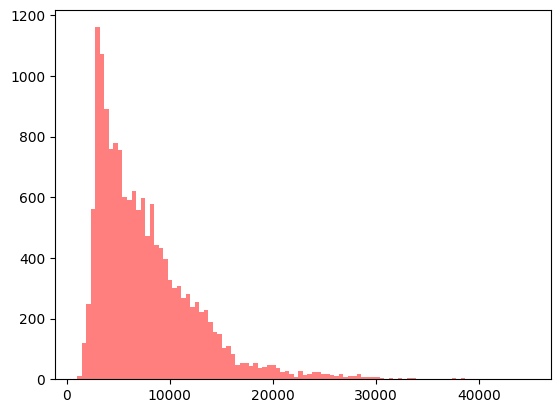

... outlier


In [4]:
#outlier_thresh=40000
outlier_thresh=50000

x1=[]
x2=[]
for r,l in zip(df["NoteLengths"],df["NoteLabels"]):
    for e1,e2 in zip(r,l):
        x1.append(e1)
        x2.append(e2)
x=np.array(x1)
fig = plt.figure()
#plt.hist(x[x<100000], bins=100, color='red', alpha=0.5)
plt.hist(x, bins=100, color='red', alpha=0.5)
plt.show()

print("... outlier")
for e1,e2 in zip(x1,x2):
    if e1>outlier_thresh:
        print(e1,e2)

In [5]:
target_sym_thresh=100
counter={}
target_sym_list=[]
for e1,e2 in zip(x1,x2):
    if e2 not in counter:
        counter[e2]=0
    else:
        counter[e2]+=1
print("... rare events: event name, count")
for k,v in counter.items():
    if v>=target_sym_thresh:
        target_sym_list.append(k)
    else:
        print(k,v)



... rare events: event name, count
aaa 64
neq 78
akx 55
alb 78
ale 67
alf 61
alg 44
alh 7
akr 54
aks 65
ald 25
ali 67
awl 31
awk 17
akq 76
amq 3
awv 1
aky 33
aia 13
aib 7
aic 17
aid 10
aie 11
aif 6
aig 3
ngj 31
aii 4
ail 18
aab 0
aik 4
aku 82
abu 23
akw 2
awf 20
awn 5
ald? 0
aou 13
aon 11
acv 7
acl 34
nfr 38
acn 41
acu 3
act 4
aac 2
nea 26
acp 71
acq 0
acr 53
acs 32
ajs 4
ajt 5
aju 6
ajv 0
ajw 28
ajx 3
ami 1
apu 7
apv 1
amj 3
amk 1
ael 19
aem 9
aeo 3
aep 0
aet 1
aeq 2
aes 0
aeu 39
aev 1
afa 0
afb 5
afc 0
aen 0
aqr 63
aqs 23
aqt 15
aqv 30
aqq 17
anj 14
aqu 14
afu 57
arj 37
ara 17
awb 2
arf 7
aym 11
are 47
arc 61
ard 33
ajd 60
ayn 3
agt 8
arb 39
aft 56
ayo 0
aso 24
ayp 1
ahh 21
nff 9
ahj 25
ahk 3
ahl 14
ahu 2
abe 26
abf 10
abg 57
abh 9
abi 14
abl 1
abm 1
abn 1
aho 17
ahp 50
ahq 27
ahr 53
ahs 6
aht 13
amd 38
ahv 1
amr 41
ams 33
amu 13
amt 42
awj 14
amv 22
amw 16
amx 14
amy 12
ana 3
amz 7
anb 13
anc 1
aiw 85
ahm 17
ane 11
and 18
alj 0
anf 43
anh 6
apf 32
aoj 9
aok 14
anq 3
aqa 28
aqb 21
aq

#target_sym_list: 11


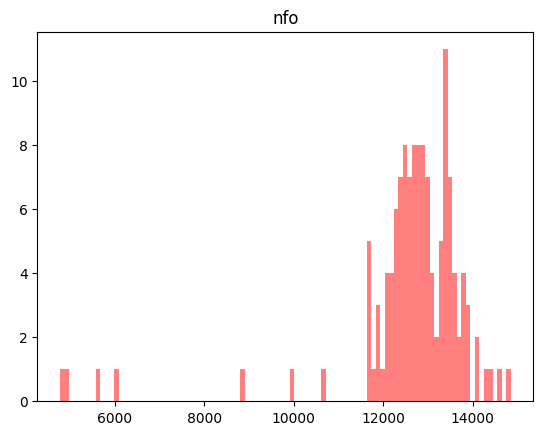

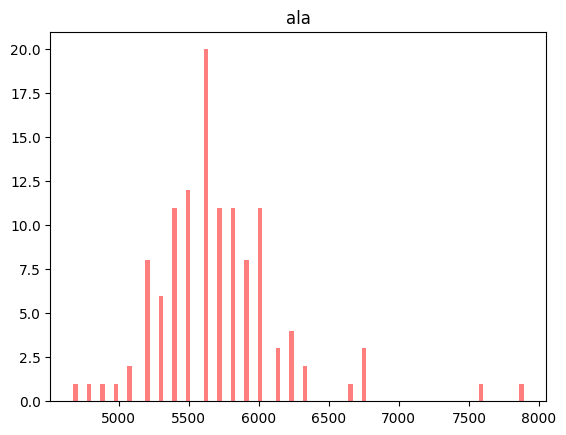

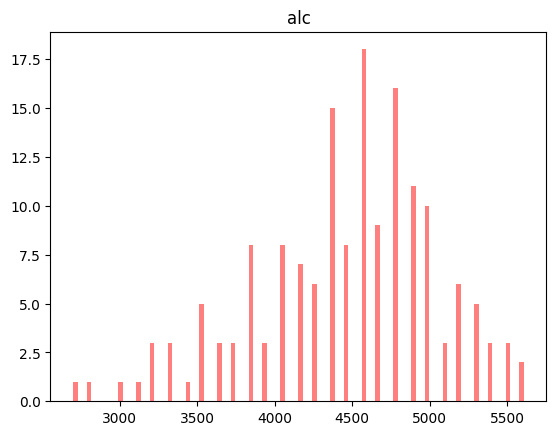

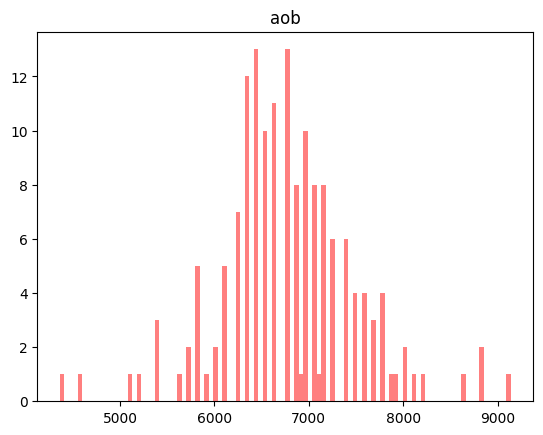

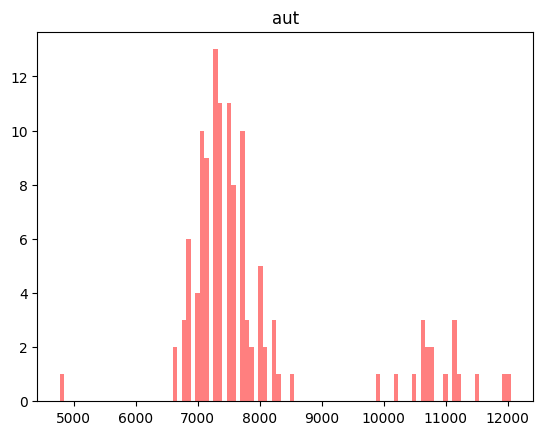

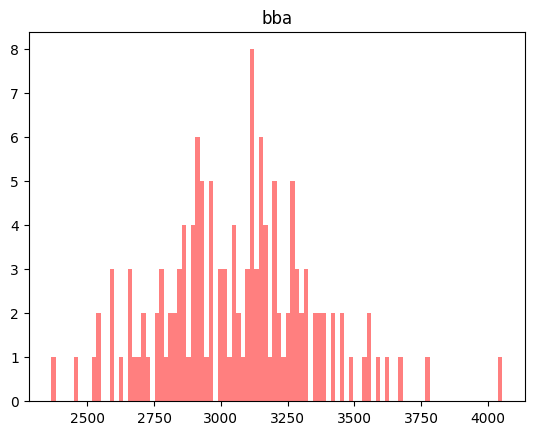

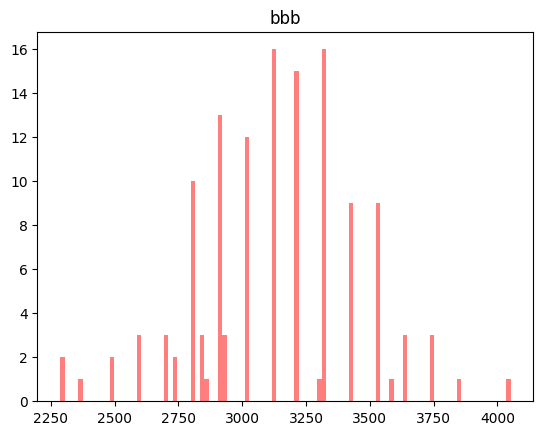

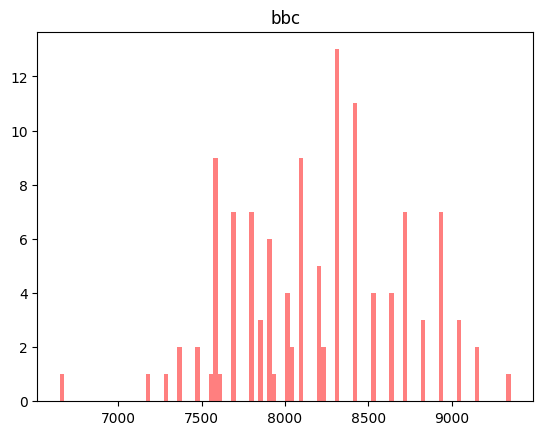

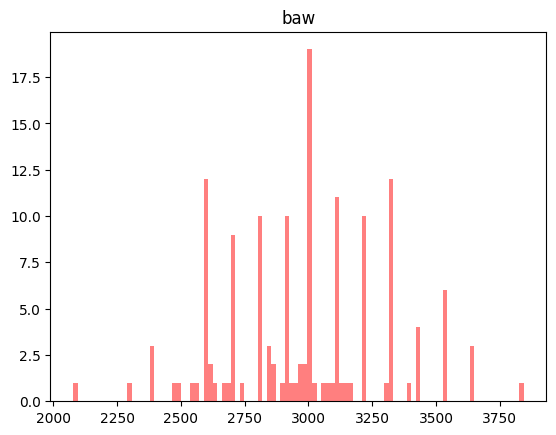

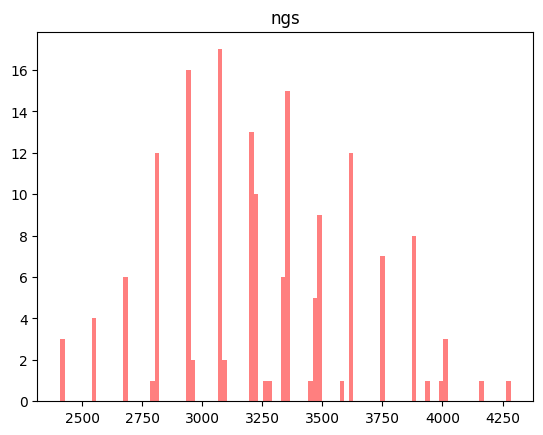

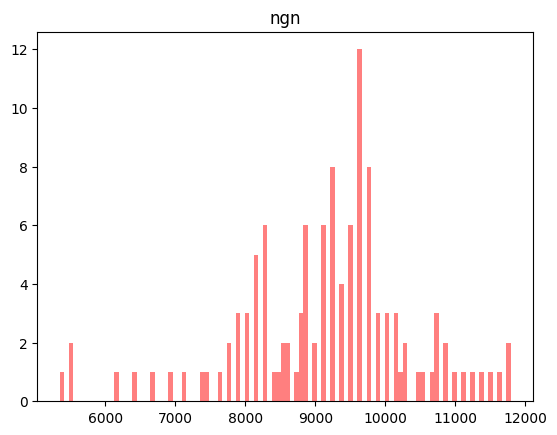

In [7]:
print("#target_sym_list:",len(target_sym_list))
for k in target_sym_list:
    xx=[]
    for e1,e2 in zip(x1,x2):
        if e2==k:
            xx.append(e1) 
    fig = plt.figure()
    plt.title(k)
    plt.hist(xx, bins=100, color='red', alpha=0.5)
    plt.show()

In [8]:
interval_list=[]
for i,r in df.iterrows():
    pos =r["NotePositions"]
    lens=r["NoteLengths"]
    wav=r["WavLoc"]
    arr=[(p,p+l)for p,l in zip(pos,lens)]
    for i in range(len(arr)-1):
        interval = float(arr[i+1][0]-arr[i][1])
        interval_list.append(interval)

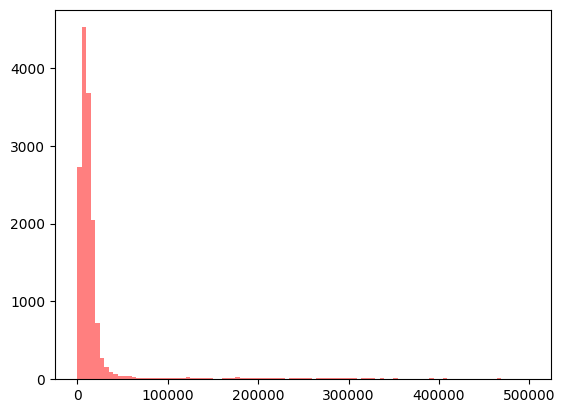

In [9]:
interval_list=np.array(interval_list)
fig = plt.figure()
plt.hist(interval_list[interval_list<500000], bins=100, color='red', alpha=0.5)
plt.show()

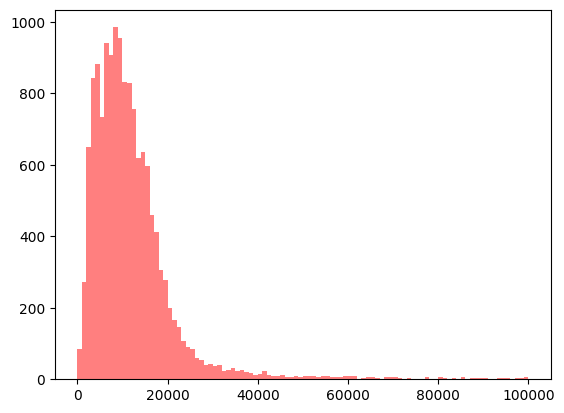

In [10]:
fig = plt.figure()
plt.hist(interval_list[interval_list<100000], bins=100, color='red', alpha=0.5)
plt.show()

In [11]:
thresh_interval=20000
skip_list=["Chatter","new3",
    "Uncertainty",
    "Chatter begins",
    "new1",
    "ald?","See 1026 from 2012 mine CAVI","Missed some phrases","chatter",
    '1', '>1','~1','2','3','4',
]
out_data=[]

for j,r in df.iterrows():
    pos =r["NotePositions"]
    lens=r["NoteLengths"]
    syms=r["NoteLabels"]
    wav=r["WavLoc"]
    seg_arr=[]
    for p,l,s in zip(pos,lens,syms):
        if s not in skip_list and s in target_sym_list:
            seg_arr.append((p,p+l,s))
    start_pos=None
    end_pos=None
    new_list=[]
    sym_list=[]
    for i in range(len(seg_arr)-1):
        interval = float(seg_arr[i+1][0]-seg_arr[i][1])
        sym_list.append(seg_arr[i][2])
        if start_pos is None:
            start_pos=seg_arr[i][0]
        temp_duartion=seg_arr[i+1][1]-start_pos
        if interval >= thresh_interval or temp_duartion>100000:
            end_pos=seg_arr[i][1]
            new_list.append((start_pos,end_pos,sym_list))
            start_pos=seg_arr[i+1][0]
            end_pos=None
            sym_list=[]
    if start_pos is not None and end_pos is None:
        end_pos=seg_arr[-1][1]
        sym_list.append(seg_arr[-1][2])
        new_list.append((start_pos,end_pos,sym_list))
    pair=(wav,new_list)
    out_data.append(pair)
    

In [12]:
duration_list=[]
symbol_list=[]
for wav, seg_list in out_data:
    for seg in seg_list:
        duration_list.append(seg[1]-seg[0])
        symbol_list.extend(seg[2])
duration_list=np.array(duration_list)

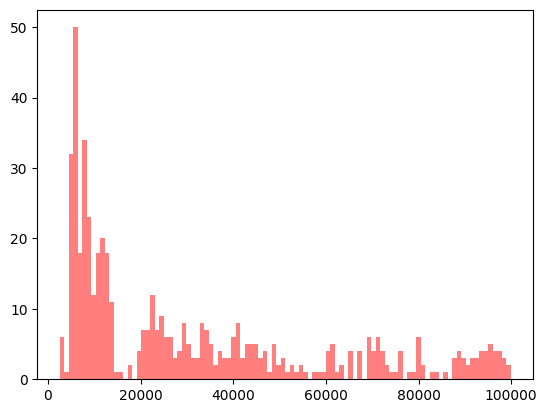

In [13]:
fig = plt.figure()
#plt.hist(duration_list[duration_list<100000], bins=100, color='red', alpha=0.5)
plt.hist(duration_list, bins=100, color='red', alpha=0.5)
plt.show()


In [14]:
print("target symbol list:",len(target_sym_list))

target symbol list: 11


In [15]:
for wav, seg_list in out_data:
    for seg in seg_list:
        seg_start,seg_stop = seg[0],seg[1]
        if seg_stop-seg_start>80000:
            syms=seg[2]
            print(syms)
            

['nfo', 'nfo', 'nfo', 'ala']
['nfo', 'nfo', 'nfo', 'alc', 'alc']
['nfo', 'nfo', 'nfo', 'nfo']
['nfo', 'nfo', 'nfo', 'nfo']
['nfo', 'nfo', 'nfo', 'alc', 'alc']
['nfo', 'nfo', 'nfo', 'alc', 'alc']
['aut', 'aut', 'bba', 'bbb', 'bbc', 'bba', 'bbb']
['bba', 'bbb', 'bbc', 'bba', 'bbb', 'bbc', 'baw', 'baw']
['aut', 'aut', 'aob', 'aob', 'aob', 'bba']
['aob', 'aob', 'bba', 'bbb', 'bbc', 'bba', 'bbb', 'bbc']
['aut', 'aob', 'aob', 'aob', 'bba', 'bbb', 'bbc']
['aob', 'aob', 'aob', 'aut', 'aut']
['aob', 'aob', 'aob', 'aut', 'bba', 'bbb', 'bbc']
['aut', 'aut', 'bba', 'bbb', 'bbc', 'bba', 'bbb', 'bbc']
['aob', 'aob', 'aob', 'bba', 'bbb', 'bbc', 'bba', 'bbb']
['aob', 'aob', 'aob', 'aut', 'aut']
['aob', 'aob', 'aut', 'aut', 'baw', 'baw']
['aob', 'aob', 'aob', 'aut', 'bba', 'bbb', 'bbc']
['aob', 'aob', 'aob', 'aut', 'bba', 'bbb']
['aut', 'aut', 'bba', 'bbb', 'bbc', 'bba', 'bbb']
['aut', 'bba', 'bbb', 'bba', 'bbb', 'bbc', 'bba', 'bbb']
['aob', 'aob', 'aob', 'aut', 'aut']
['aob', 'aob', 'aob', 'aut', 'bba

In [16]:
print("#segment:",len([_ for wav, seg_list in out_data for seg in seg_list]))

#segment: 528


In [17]:
from scipy.io import wavfile
import os
output_path="data_bird01_cath_phrase"
os.makedirs(output_path,exist_ok=True)
result_data=[]
#for wav, seg_list in out_data[:3]:
for wav, seg_list in out_data:
    try:
        rate, data = wavfile.read(wav)
    except Exception as e:
        print('WAV file did not load: ' + wav)
        print(e)
        continue
    for seg in seg_list:
        seg_start,seg_stop = seg[0],seg[1]
        syms=seg[2]
        d=data[seg_start:seg_stop]
        name=os.path.basename(wav)
        filename=output_path+"/"+name+"."+str(seg_start)+"-"+str(seg_stop)+".wav"
        wavfile.write(filename,rate,d)
        result_data.append((wav,filename,seg_start,seg_stop,"-".join(syms)))


In [18]:
idx=list(range(len(result_data)))
np.random.shuffle(idx)
r=0.8
train_n=int(len(result_data)*r)
valid_n=len(result_data)-train_n

with open("bird01_cath_train.txt","w") as fp:
    for i in idx[:train_n]:
        wav,filename,seg_start,seg_stop,syms = result_data[i]
        s=filename+"|"+"SIL-"+syms+"-SIL"
        fp.write(s)
        fp.write("\n")
with open("bird01_cath_valid.txt","w") as fp:
    for i in idx[train_n:]:
        wav,filename,seg_start,seg_stop,syms = result_data[i]
        s=filename+"|"+"SIL-"+syms+"-SIL"
        fp.write(s)
        fp.write("\n")
        

In [19]:
print(list(set(target_sym_list)-set(skip_list))+["SIL"," "])

['bba', 'aut', 'bbc', 'ngs', 'ngn', 'ala', 'nfo', 'bbb', 'baw', 'alc', 'aob', 'SIL', ' ']


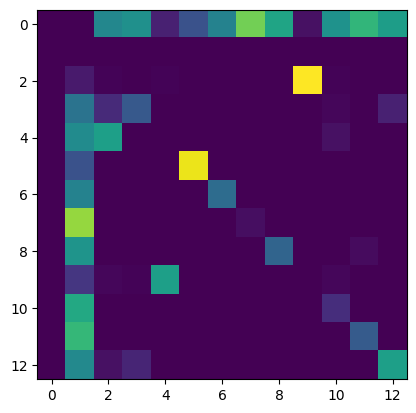

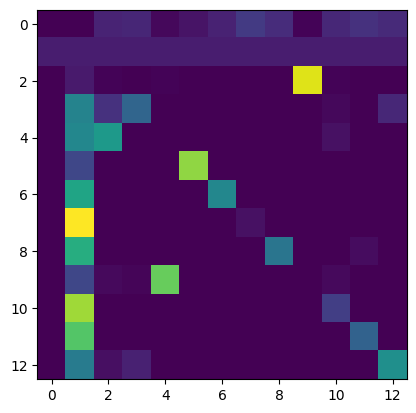

In [48]:
transition=[]
for wav, seg_list in out_data:
    for seg in seg_list:
        syms=seg[2]
        transition.append(("ini",syms[0]))
        for i in range(len(syms)-2):
            transition.append((syms[i],syms[i+1]))
        transition.append((syms[len(syms)-1],"end"))
import collections
couter=collections.Counter(transition)
couter

tr_syms=["ini","end"]+list(set(target_sym_list)-set(skip_list))
tr_mat=np.zeros((len(tr_syms),len(tr_syms)))

for i in range(len(tr_syms)):
    for j in range(len(tr_syms)):
        tr_mat[i,j]=couter[(tr_syms[i],tr_syms[j])]
plt.imshow(tr_mat)
plt.show()
eps=0.1
tr_prob_mat=(tr_mat+eps)/(np.sum(tr_mat+eps,axis=1,keepdims=True))
plt.imshow(tr_prob_mat)
plt.show()


In [56]:
state=0
states=[0]
for _ in range(30):
    next_state=np.random.choice(len(tr_syms), 1, p=tr_prob_mat[state,:])[0]
    states.append(next_state)
    state=next_state
    if next_state==1:
        break
print(states)
print([tr_syms[i] for i in states])


[0, 10, 1]
['ini', 'baw', 'end']


In [79]:
import networkx as nx
G = nx.DiGraph()
G.add_edges_from([(i,j) for i,j in zip(*np.where(tr_mat>2.0/len(tr_syms)))])
#zip(*np.where(tr_mat>1.0/len(tr_syms)))


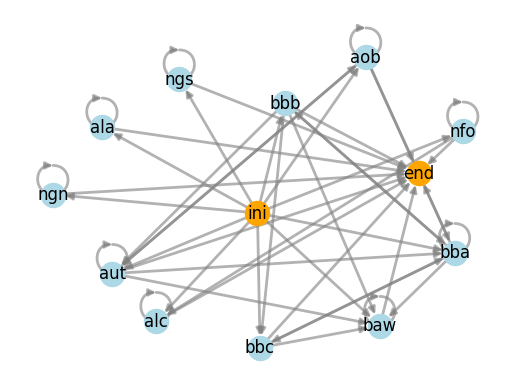

In [109]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(15,15))
pos = nx.spring_layout(G,k=3.)
nx.draw_networkx_nodes(G, pos,nodelist=[i+2 for i in range(len(tr_syms)-2)],node_color="lightblue")# alpha=0.1)
nx.draw_networkx_nodes(G, pos,nodelist=[0],node_color="orange")# node_color="w",alpha=0.1)
nx.draw_networkx_nodes(G, pos,nodelist=[1],node_color="orange")# node_color="w",alpha=0.1)
nx.draw_networkx_labels(G, pos,{i:k for i,k in enumerate(tr_syms)},font_size=12)
nx.draw_networkx_edges(G, pos,alpha=0.6, edge_color="gray", width=2)

#nx.draw_networkx(G,pos)

plt.axis("off")
plt.savefig("default.png")
plt.show()


In [112]:
import json
tr_syms[0]="SIL"
tr_syms[1]="SIL"
fp=open("bird01_cath_info.json","w")
json.dump({"mat":tr_prob_mat.tolist(),"symbols":tr_syms},fp)


In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df2=pickle.load(open("song_df2.pkl","rb"))
df2

,bird,WavTime,WavLoc,NumNote,species,WaveFileName,SepWaveFileName,label,begin,end,y
0,CATH-TLR2,2012-01-19 07:13:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-01-...,25,CATH,2012-01-19_07-13-00-000000.wav,./data2/2012-01-19_07-13-00-000000.1676064-167...,CATH-aaa,1676064,1678350,206
1,CATH-TLR2,2012-01-19 07:13:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-01-...,25,CATH,2012-01-19_07-13-00-000000.wav,./data2/2012-01-19_07-13-00-000000.3833116-383...,CATH-aaa,3833116,3835402,206
2,CATH-TLR2,2012-01-19 07:13:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-01-...,25,CATH,2012-01-19_07-13-00-000000.wav,./data2/2012-01-19_07-13-00-000000.608475-6115...,CATH-aaa,608475,611592,206
3,CATH-TLR2,2012-01-19 07:13:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-01-...,25,CATH,2012-01-19_07-13-00-000000.wav,./data2/2012-01-19_07-13-00-000000.2769182-277...,CATH-aaa,2769182,2772611,206
4,CATH-TLR2,2012-01-19 07:13:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-01-...,25,CATH,2012-01-19_07-13-00-000000.wav,./data2/2012-01-19_07-13-00-000000.2653387-265...,CATH-aaa,2653387,2656296,206
...,...,...,...,...,...,...,...,...,...,...,...
79081,BHGRGTNP3-13,2013-06-13 09:33:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,300,BHGR,2013-06-13_09-33-00-000000.wav,./data2/2013-06-13_09-33-00-000000.686872-6947...,BHGR-rx,686872,694789,152
79082,BHGRGTNP3-13,2013-06-13 09:33:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,300,BHGR,2013-06-13_09-33-00-000000.wav,./data2/2013-06-13_09-33-00-000000.2892060-290...,BHGR-jt,2892060,2903606,92
79083,BHGRGTNP3-13,2013-06-13 09:33:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,300,BHGR,2013-06-13_09-33-00-000000.wav,./data2/2013-06-13_09-33-00-000000.594910-6044...,BHGR-kh,594910,604476,341
79084,BHGRGTNP3-13,2013-06-13 09:33:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,300,BHGR,2013-06-13_09-33-00-000000.wav,./data2/2013-06-13_09-33-00-000000.1878541-188...,BHGR-sc,1878541,1887447,375


In [9]:
df["species"].value_counts()

CAVI     429
CATH      95
BHGR      74
RDTHT      5
WETA       3
Name: species, dtype: int64

In [10]:
df

,bird,species,WavTime,WavLoc,WaveFileName,Position,Length,NumNote,NotePositions,NoteLengths,NoteLabels
0,CATH-TLR2,CATH,2012-01-19 07:13:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-01-...,2012-01-19_07-13-00-000000.wav,None,None,25,"[1524, 105140, 211544, 302689, 403084, 504005,...","[3637, 3533, 3325, 2909, 3221, 3429, 3117, 311...","[aaa, aaa, aaa, aaa, aaa, aaa, aaa, aaa, aaa, ..."
1,CATH-TLR2,CATH,2012-02-09 13:45:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-02-...,2012-02-09_13-45-00-000000.wav,None,None,398,"[4431, 27697, 53560, 84720, 114114, 142262, 15...","[3635, 7478, 12879, 13294, 14125, 6128, 4570, ...","[neq, akx, nfo, nfo, nfo, ala, alb, ala, ala, ..."
2,CATH-TLR2,CATH,2012-02-08 10:25:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-02-...,2012-02-08_10-25-00-000000.wav,None,None,98,"[20438, 39561, 61490, 85601, 114285, 144528, 1...","[5196, 4676, 12263, 11536, 12471, 6547, 7586, ...","[aia, aib, aic, aic, aic, aid, aie, aie, aid, ..."
3,CATH-TLR2,CATH,2012-02-09 10:30:00,./data_clean/data/CATH/CATH-TLR2/wavs/2012-02-...,2012-02-09_10-30-00-000000.wav,None,None,819,"[20426, 47536, 77138, 108817, 138046, 149991, ...","[13191, 13918, 13087, 13918, 3739, 9348, 8517,...","[nfo, nfo, nfo, nfo, aku, akr, aks, aks, akq, ..."
4,CATH-TLR12,CATH,2012-01-19 08:00:00,./data_clean/data/CATH/CATH-TLR12/wavs/2012-01...,2012-01-19_08-00-00-000000.wav,None,None,15,"[14921, 214668, 229218, 263722, 362251, 380958...","[1558, 10081, 4780, 7898, 5923, 9873, 4780, 63...","[acv, acl, nfr, acn, acn, acl, nfr, acn, acn, ..."
...,...,...,...,...,...,...,...,...,...,...,...
601,BHGRGTNP3-13,BHGR,2013-06-13 10:15:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,2013-06-13_10-15-00-000000.wav,None,None,91,"[2142213, 2165348, 2186996, 2210132, 2229466, ...","[6775, 7766, 10906, 7436, 6940, 14542, 7271, 1...","[sf, sg, sh, si, sj, aq, sk, sl, nu, mo, sm, s..."
602,BHGRGTNP3-13,BHGR,2013-06-13 10:17:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,2013-06-13_10-17-00-000000.wav,None,None,67,"[5810, 22139, 39788, 60736, 80035, 99168, 1196...","[8082, 8577, 11711, 10391, 10556, 10061, 8412,...","[so, sp, jp, sh, sq, sr, sr, ss, st, nu, uh, s..."
603,BHGRGTNP3-13,BHGR,2013-06-13 09:20:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,2013-06-13_09-20-00-000000.wav,None,None,245,"[199690, 216350, 237957, 257916, 276389, 29528...","[4618, 10061, 8577, 7752, 9325, 5278, 12535, 7...","[jh, ru, rv, rw, kh, rh, pm, ry, se, rs, ou, o..."
604,BHGRGTNP3-13,BHGR,2013-06-13 09:44:00,./data_clean/data/BHGR/BHGRGTNP3-13/wavs/2013-...,2013-06-13_09-44-00-000000.wav,None,None,109,"[7797, 30911, 56336, 74992, 92987, 112634, 129...","[10401, 11887, 6934, 8089, 9575, 10731, 9245, ...","[kd, jt, rw, rx, nn, uf, ug, ov, kd, nv, rp, r..."


In [23]:
count={}
count_len={}
for i,row in df.iterrows():
    #filename=row["SepWaveFileName"]
    sp=row["species"]
    if sp not in count:
        count[sp]=0
        count_len[sp]=0
    count[sp]+=row["NumNote"]
    length=sum(row["NoteLengths"])/44100#int(row["end"])-int(row["begin"])
    count_len[sp]+=length


In [20]:
count

{'CATH': 15700, 'RDTHT': 912, 'CAVI': 67824, 'WETA': 297, 'BHGR': 10754}

In [24]:
count_len

{'CATH': 2745.995691609977,
 'RDTHT': 104.60138321995464,
 'CAVI': 23953.382721088434,
 'WETA': 86.95671201814059,
 'BHGR': 2438.408707482995}